In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [3]:

# Load UCI Cleveland dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cols = [
    'age', 'gender', 'chest_pain_type', 'resting_blood_pressure',
    'cholesterol', 'fasting_blood_sugar', 'resting_ecg',
    'max_heart_rate', 'exercise_induced_angina', 'st_depression',
    'st_slope', 'num_major_vessels', 'thalassemia', 'heart_disease'
]

data = pd.read_csv(url, names=cols, na_values='?')
data.dropna(inplace=True)
data['heart_disease'] = data['heart_disease'].apply(lambda x: 1 if x > 0 else 0)

X = data.drop('heart_disease', axis=1)
y = data['heart_disease']


In [4]:

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Simulate ECG images (random for demonstration; replace with real data if available)
def simulate_ecg_images(num_samples, height=224, width=224):
    return np.random.rand(num_samples, height, width, 1)

# Simulate sequential data (e.g., time-series clinical measurements)
def simulate_sequential_data(num_samples, seq_length=10, num_features=5):
    return np.random.rand(num_samples, seq_length, num_features)

# Generate synthetic data for CNN and LSTM branches (for demonstration)
num_samples = len(X_train)
X_image_train = simulate_ecg_images(num_samples)
X_image_test = simulate_ecg_images(len(X_test))

X_seq_train = simulate_sequential_data(num_samples)
X_seq_test = simulate_sequential_data(len(X_test))

# Reshape static features for Dense model
X_static_train = X_train
X_static_test = X_test


In [5]:

# Model Definitions
def build_cnn_model():
    model = models.Sequential([
        layers.Input(shape=(224, 224, 1)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def build_lstm_model():
    model = models.Sequential([
        layers.Input(shape=(10, 5)),
        layers.LSTM(64),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def build_dense_model():
    model = models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def build_hybrid_model():
    # CNN for ECG images
    img_input = layers.Input(shape=(224, 224, 1))
    x1 = layers.Conv2D(16, (3, 3), activation='relu')(img_input)
    x1 = layers.MaxPooling2D((2, 2))(x1)
    x1 = layers.Flatten()(x1)

    # LSTM for sequential data
    seq_input = layers.Input(shape=(10, 5))
    x2 = layers.LSTM(32)(seq_input)

    # Dense for static features
    static_input = layers.Input(shape=(X_train.shape[1],))
    x3 = layers.Dense(16, activation='relu')(static_input)

    # Combine all branches
    combined = layers.concatenate([x1, x2, x3])
    x = layers.Dense(64, activation='relu')(combined)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs=[img_input, seq_input, static_input], outputs=output)
    return model


In [6]:

# Training and Evaluation Function
def train_and_evaluate(model, inputs_train, inputs_test, y_train, y_test, epochs=10, model_name=""):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    start = time.time()
    model.fit(inputs_train, y_train, epochs=epochs, batch_size=32, verbose=0)
    training_time = time.time() - start

    # Predictions
    y_pred = (model.predict(inputs_test) > 0.5).astype(int)

    # Metrics
    accuracy = roc_auc_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Plot Confusion Matrix
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix ({model_name})")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'classification_report': report,
        'training_time': training_time
    }


🔎 CNN Only
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


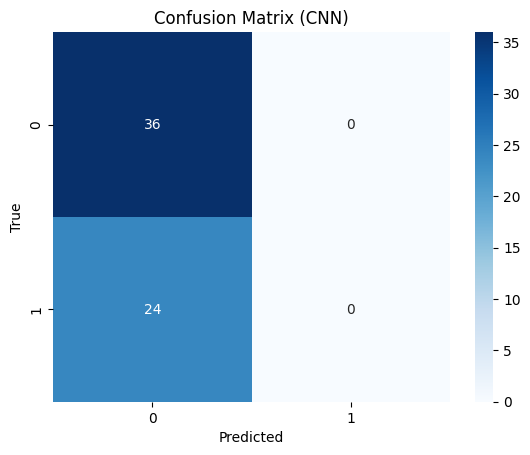

🔎 LSTM Only
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


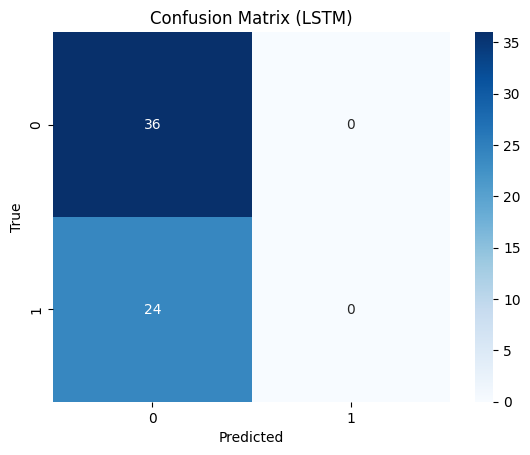

🔎 Dense Only


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


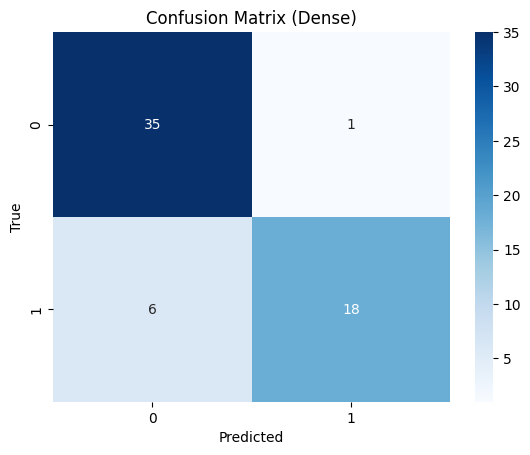

🔎 Hybrid Model
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step


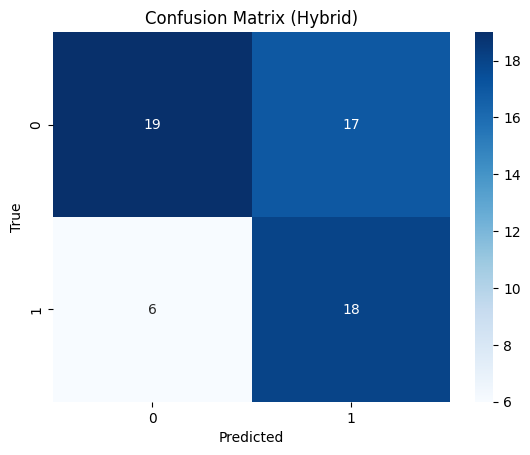


📊 Model Performance Summary:

=== CNN ===
Accuracy (ROC AUC): 0.5000
Training Time: 177.13 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        36
           1       0.00      0.00      0.00        24

    accuracy                           0.60        60
   macro avg       0.30      0.50      0.38        60
weighted avg       0.36      0.60      0.45        60


=== LSTM ===
Accuracy (ROC AUC): 0.5000
Training Time: 3.83 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        36
           1       0.00      0.00      0.00        24

    accuracy                           0.60        60
   macro avg       0.30      0.50      0.38        60
weighted avg       0.36      0.60      0.45        60


=== Dense ===
Accuracy (ROC AUC): 0.8611
Training Time: 1.88 seconds
Classification Report:
              precision    recall  f1-

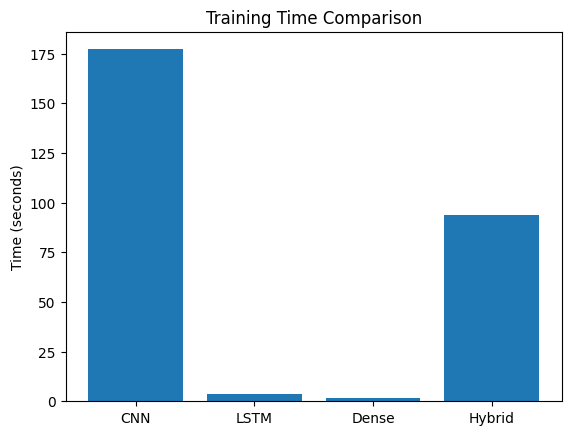

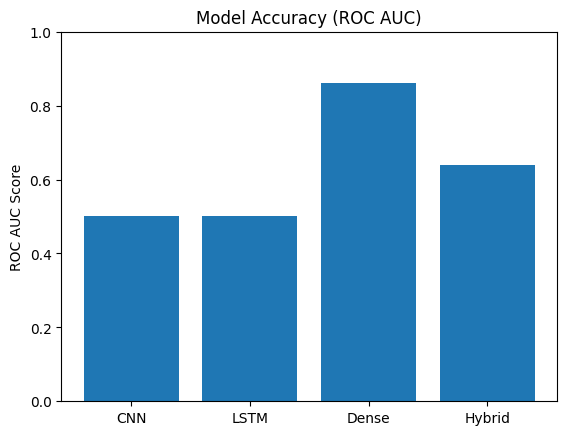

In [7]:

# Train and Evaluate All Models
results = []

# 1. CNN Only
print("🔎 CNN Only")
cnn_model = build_cnn_model()
result = train_and_evaluate(
    cnn_model,
    X_image_train, X_image_test,
    y_train, y_test,
    model_name="CNN"
)
results.append(result)

# 2. LSTM Only
print("🔎 LSTM Only")
lstm_model = build_lstm_model()
result = train_and_evaluate(
    lstm_model,
    X_seq_train, X_seq_test,
    y_train, y_test,
    model_name="LSTM"
)
results.append(result)

# 3. Dense Only
print("🔎 Dense Only")
dense_model = build_dense_model()
result = train_and_evaluate(
    dense_model,
    X_static_train, X_static_test,
    y_train, y_test,
    model_name="Dense"
)
results.append(result)

# 4. Hybrid Model
print("🔎 Hybrid Model")
hybrid_model = build_hybrid_model()
result = train_and_evaluate(
    hybrid_model,
    [X_image_train, X_seq_train, X_static_train],
    [X_image_test, X_seq_test, X_static_test],
    y_train, y_test,
    model_name="Hybrid"
)
results.append(result)

# Print Results
print("\n📊 Model Performance Summary:")
for res in results:
    print(f"\n=== {res['model_name']} ===")
    print(f"Accuracy (ROC AUC): {res['accuracy']:.4f}")
    print(f"Training Time: {res['training_time']:.2f} seconds")
    print("Classification Report:")
    print(res['classification_report'])

# Plot Training Time Comparison
plt.figure()
plt.bar([res['model_name'] for res in results], [res['training_time'] for res in results])
plt.title("Training Time Comparison")
plt.ylabel("Time (seconds)")
plt.show()

# Plot Accuracy Comparison
plt.figure()
plt.bar([res['model_name'] for res in results], [res['accuracy'] for res in results])
plt.title("Model Accuracy (ROC AUC)")
plt.ylabel("ROC AUC Score")
plt.ylim(0, 1)
plt.show()